In [2]:
import networkx as nx
import matplotlib.pyplot as  plt
import numpy as np
import pandas as pd


In [3]:
t_small = pd.read_csv("twitter-small.tsv", sep ='\t',header =None)

In [4]:
t_small.columns=['timestamp','user','tweet']
users = t_small['user']

In [5]:
import re
ajd_list = {}

for user in users:
  ajd_list[user] = {}
  tweets = t_small.loc[t_small['user'] == user, 'tweet']
  for tweet in tweets:
    mentions = re.findall(r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)", tweet)
    for mention in mentions:
      count = ajd_list[user].get(mention)
      if count != None:
        count  = ajd_list[user].get(mention).get("weight")
        ajd_list[user][mention]["weight"] = count + 1
      else :
         ajd_list[user][mention] = {}
         ajd_list[user][mention]["weight"] = 1
        #  ajd_list[user]["weight"] = 1

In [6]:
import csv
fields = ['user','mention', 'count']
with open('twitter.csv', 'w') as f:
    w = csv.DictWriter(f, fields)
    w.writeheader()
    for k in ajd_list:
       w.writerow({field: ajd_list[k].get(field) or k for field in fields})

In [7]:
G = nx.DiGraph(ajd_list)
nx.write_edgelist(G, "small.edgelist")

In [8]:
nx.write_edgelist(G, "test.edgelist")

In [9]:
print("Twitter Small Number of Edges:",G.number_of_edges())
print("Twitter Small Number of Nodes:",G.number_of_nodes())
print("Twitter Small Number of Strongly Connect Components:",nx.number_strongly_connected_components(G))
print("Twitter Small Number of Weakly Connect Components:",nx.number_weakly_connected_components(G))
print("Twitter Small Density:",nx.density(G))
print("Twitter Small Average Clustering:",nx.average_clustering(G))



Twitter Small Number of Edges: 152624
Twitter Small Number of Nodes: 94341
Twitter Small Number of Strongly Connect Components: 92644
Twitter Small Number of Weakly Connect Components: 4337
Twitter Small Density: 1.714851367664414e-05
Twitter Small Average Clustering: 0.025704229428117266


In [10]:
giant = max(nx.connected_components(G.to_undirected()), key=len )

G_giant = G.subgraph(giant)

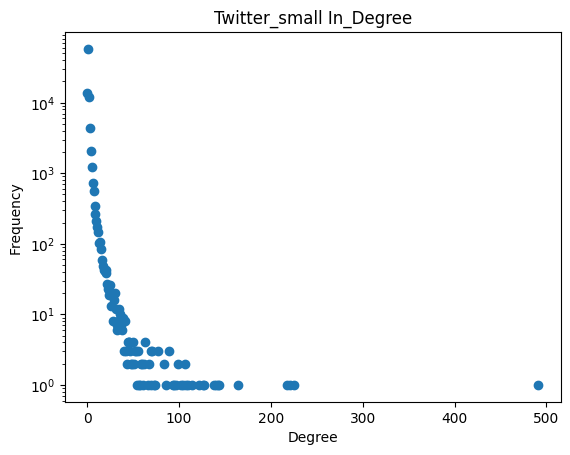

In [11]:
l_nodes = list(G.nodes)
# M_nodes = list(medium.nodes)
# print(l_nodes)

# m_out ={}
# m_in = {}
m_in = []
for i in l_nodes:
  m_in.append(G.in_degree(i))
freq = {}
for item in m_in:
  if (item in freq):
    freq[item] += 1
  else:
    freq[item] = 1

x = list(freq.keys())
y = list(freq.values())
plt.scatter(x,y )
plt.title("Twitter_small In_Degree")
plt.xlabel("Degree")
plt.ylabel("Frequency ")
plt.yscale('log')
plt.show()

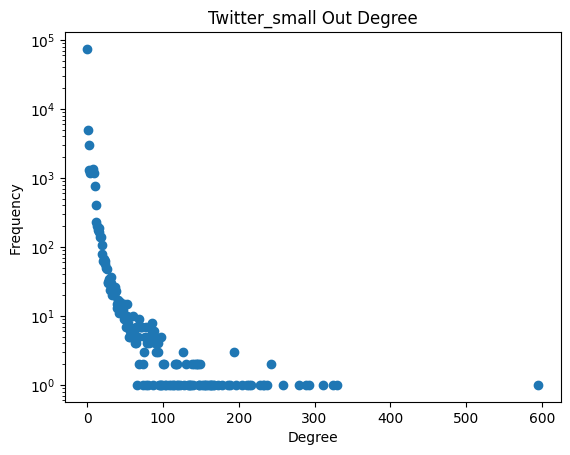

In [12]:
l_nodes = list(G.nodes)

m_out = [] 
for i in l_nodes:
  m_out.append(G.out_degree(i))


freq = {}
for item in m_out:
  if (item in freq):
    freq[item] += 1
  else:
    freq[item] = 1


x = list(freq.keys())
y = list(freq.values())
plt.scatter(x,y )
plt.title("Twitter_small Out Degree")
plt.xlabel("Degree")
plt.ylabel("Frequency ")
plt.yscale('log')
plt.show()

In [13]:
average_distance = nx.average_shortest_path_length(G_giant)

NetworkXError: Graph is not strongly connected.

In [ ]:
# distances = nx.all_pairs_shortest_path_length(G_giant)
# distance_distribution = {}


# # print(distances)
# for source, target_lengths in distances:
#     for target, length in target_lengths.items():
#         if length not in distance_distribution:
#             distance_distribution[length] = 1
#         else:
#             distance_distribution[length] =+ 1

In [14]:
distances = []
for node in G_giant.nodes():
    paths = nx.single_source_shortest_path_length(G_giant, node)
    distances.extend(paths.values())

distance_count = {}
for distance in distances:
    if distance in distance_count:
        distance_count[distance] += 1
    else:
        distance_count[distance] = 1

In [ ]:
x = list(distance_count.keys())
y = list(distance_count.values())
comp = nx.community.girvan_newman(G)
plt.bar(x, y)
plt.xlabel("Distances")
plt.ylabel("Number of Pairs")
plt.title("Distance Distribution of the Giant Connected Component In Medium Netowrk")
plt.yscale('log')
plt.show()

In [ ]:
nx.write_edgelist(G_giant, "G_giant.edgelist")

In [ ]:
from networkx.algorithms import community
import community.community_louvain as cl

# communities = cl.best_partition(G_giant.to_undirected())
com = nx.community.girvan_newman(G)

In [ ]:
import itertools

# tuple(sorted(c) for c in next(comp))

k = 5
for communities in itertools.islice(com, k):
    print(tuple(sorted(c) for c in communities))

In [ ]:
import networkx as nx

# Create a directed graph (DiGraph), you can load your data or generate it here
# G = nx.DiGraph()

# # Add nodes and edges to the graph (replace with your data)
# # Example:
# G.add_edge(1, 2)
# G.add_edge(1, 3)
# Add more nodes and edges as needed...

# Calculate degree centrality for in-degrees
in_degree_centrality = nx.in_degree_centrality(G)

# Calculate degree centrality for out-degrees
out_degree_centrality = nx.out_degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Sort the centrality dictionaries to get the top 20 users
top_20_in_degree = sorted(in_degree_centrality, key=in_degree_centrality.get, reverse=True)[:20]
top_20_out_degree = sorted(out_degree_centrality, key=out_degree_centrality.get, reverse=True)[:20]
top_20_betweenness = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:20]
top_20_closeness = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:20]

# Print or analyze the results
print("Top 20 users by In-Degree Centrality:", top_20_in_degree)
print("Top 20 users by Out-Degree Centrality:", top_20_out_degree)
print("Top 20 users by Betweenness Centrality:", top_20_betweenness)
print("Top 20 users by Closeness Centrality:", top_20_closeness)

# To compare the rankings, you can use a similarity measure like Jaccard Index
in_out_similarity = len(set(top_20_in_degree) & set(top_20_out_degree)) / len(set(top_20_in_degree) | set(top_20_out_degree))
betweenness_closeness_similarity = len(set(top_20_betweenness) & set(top_20_closeness)) / len(set(top_20_betweenness) | set(top_20_closeness))

print("Jaccard Index between In-Degree and Out-Degree Centrality:", in_out_similarity)
print("Jaccard Index between Betweenness and Closeness Centrality:", betweenness_closeness_similarity)
